# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np
import cv2

# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file="../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)   
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import pandas as pd
    
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
# Load and Print Label's from signnames.csv
# access lable  name with: snData.at[<label#>,'SignName'], e.g. snData.at[14,'SignName'] -> "Stop"
snData = pd.read_csv("signnames.csv")
print(snData)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

10 : No passing for vehicles over 3.5 metric tons


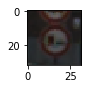

In [5]:
# Visualize 1 Image and confirm that the lable matches the image
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index],":",snData.at[y_train[index],'SignName']) 

In [6]:
# now to visualize a sample sign from each fo the 43 classes: 
def plot_hist(n_classes,X_train,y_train,X_valid,y_valid,X_test,y_test):
    numClass_train = []
    numClass_valid = []
    numClass_test = []
    for i in range(0, n_classes):
        x_train_class_i = X_train[y_train == i]     # list of examples from training set belonging to lable i
        x_valid_class_i = X_valid[y_valid == i]     # list of examples from validation set belonging to lable i
        x_test_class_i = X_test[y_test == i]        # list of examples from test set beloning to lablee i

        # create buckets for each class containing number of examples 
        numClass_train.append(len(x_train_class_i))
        numClass_valid.append(len(x_valid_class_i))
        numClass_test.append(len(x_test_class_i))

    # plot histograms (number of images per class in X dataset)
    
    # Training Dataset
    plt.figure(figsize=(12, 6))
    plt.bar(range(0, n_classes), numClass_train)
    plt.title('Histogram of image distribution in Training Dataset')
    plt.xlabel("Class/Label Number")
    plt.ylabel("Number of Images")

    # Validation Dataset
    plt.figure(figsize=(12, 6))
    plt.bar(range(0, n_classes), numClass_valid)
    plt.title('Histogram of image distribution in Validation Dataset')
    plt.xlabel("Class/Label Number")
    plt.ylabel("Number of Images")

    # Test Dataset
    plt.figure(figsize=(12, 6))
    plt.bar(range(0, n_classes), numClass_test)
    plt.title('Histogram of image distribution in Testing Dataset')
    plt.xlabel("Class/Label Number")
    plt.ylabel("Number of images")

def plot_random(n_classes,features,labels):
    
    B = np.ones(len(features)) 
    
    plt.figure(figsize = (12,18))
    for i in range(0, n_classes):
        plt.subplot(9,5,i+1)
        
        # pick random image from all possible examples belonging to class i
        class_i_list = (labels == (i*B)).nonzero()[0]   # list of examples belonging to class i
        randInd = random.randint(0,len(class_i_list))   
        index = class_i_list[randInd]                   # randomly selected image from list
        
        # plot image and label
        plt.imshow(features[index, :, :, :]) 
        plt.text(2,4,str(i), color='k',backgroundcolor='m')
        plt.axis('off')


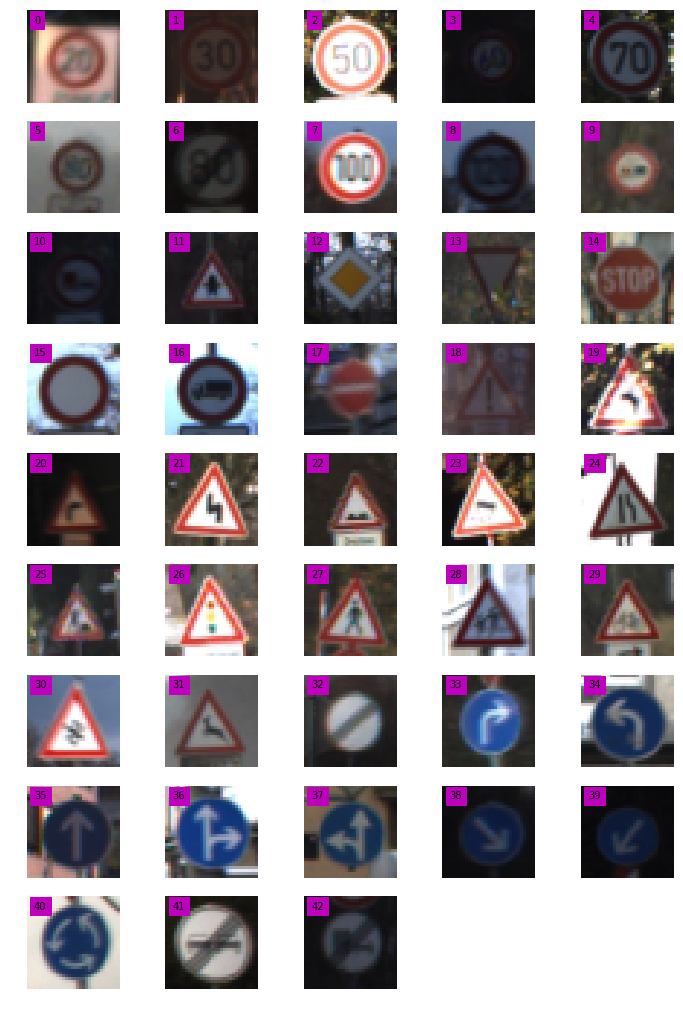

In [7]:
# plot random image from each class within training data set (and it's corresponding label)
plot_random(n_classes,X_train,y_train)

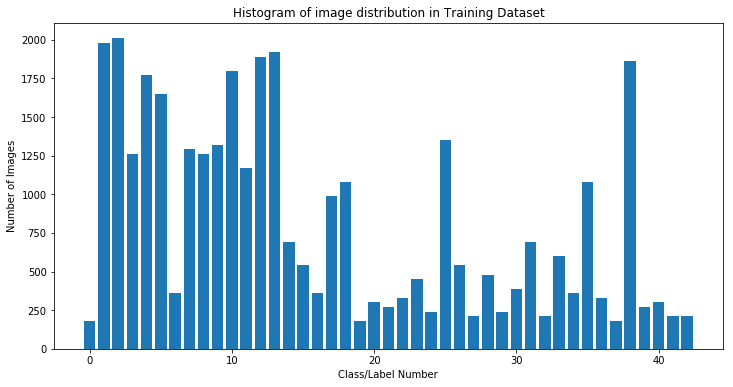

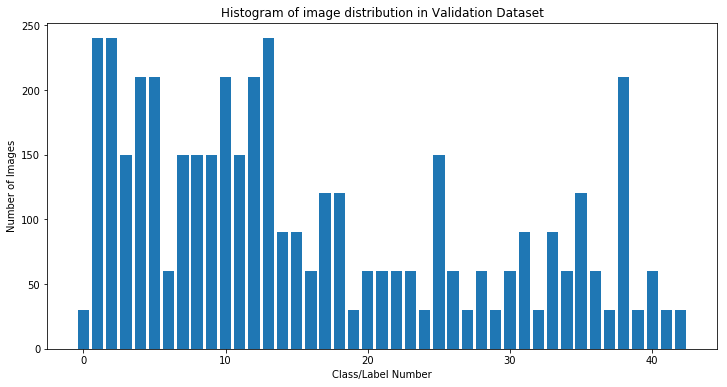

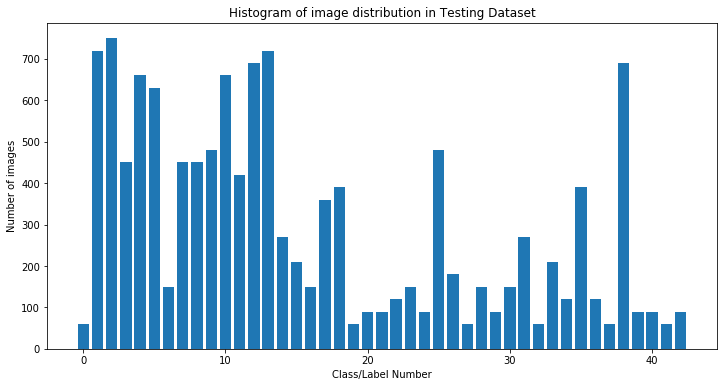

In [8]:
# plot histogram for each data set of number of images beloning to each label. 
plot_hist(n_classes,X_train,y_train,X_valid,y_valid,X_test,y_test)

Clearly there is a uneven distribution of classes in each set, but the relative number of classes in each dataset seems relatively consistant between the training, validation, and testing datasets. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import time

## [1] SHUFFLE THE DATA
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

In [10]:
## [2] Preprocessing 

# For testing histogram equalization b/c cannot blot normalized RGB with range of -0.5 to 0.5
def histEq(img):
    for i in range(img.shape[2]):
        img[:,:,i] = cv2.equalizeHist(img[:,:,i])
    return img
        
def histEq_batch(X_data):
    return np.array([histEq(X_data[i]) for i in range(len(X_data))])
    
# For testing CLAHE b/c cannot plot normalized RGB with range of -0.5 to 0.5
def CLAHE(img):
    
    # *Note: it seems that it is not necessary to do any scaling of the values from 0-1 as the conversion from RGB to LAB 
    # already does this. LAB operates in 0-1 range, not 0-255 range. 
    
    # Parameters 
    clipLimit = 2.0
    tileGridSize = (4,4)
    
    # Create CLAHE object 
    clahe = cv2.createCLAHE(clipLimit, tileGridSize)
    
    # convert image to LAB 
    lab = cv2.cvtColor(img,cv2.COLOR_RGB2LAB)
    lab_channels = cv2.split(lab)                # split lab into channels: l (lightness), a (green-red), b (clue-yellow)
    
    # apply to lab to lightness channel 
    lab_channels[0] = clahe.apply(lab_channels[0])
    lab = cv2.merge(lab_channels)
    
    # return image to RGB
    img_mod = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB) 
    
    return img_mod

def CLAHE_batch(X_data):
    return np.array([CLAHE(X_data[i]) for i in range(len(X_data))])


# Perform following preprocess operations on a n channel image:
# Histogram Equalization - account for varied lighting conditions in images.
# CLAHE - like hisogram normalization, but with contrast limiting. 
# Normalization - normalize pixle values about zero for better processing.
def preprocess_img(img,use_CLAHE = 1):
    a = -0.5
    b = 0.5
    
    if use_CLAHE:
        img = CLAHE(img)
    else:
        # Histogram Equalization 
        for i in range(img.shape[2]):
            img[:,:,i] = cv2.equalizeHist(img[:,:,i])
    
    # Normalization
    Xmin = img.min()
    Xmax = img.max()
    img = a + ((img-Xmin)*(b-a)/(Xmax-Xmin))
    
    return img

    
# Will preprocess a group of images as formated [# image, Width, Height, Channel]
def preprocess_batch(X_data,use_CLAHE):
    return np.array([preprocess_img(X_data[i],use_CLAHE) for i in range(len(X_data))])
    

Original Image
[[119 120 120 118 114  89  61  39  23  19]
 [119 121 118 116 112  90  62  41  26  18]
 [119 121 118 112 104  82  55  36  24  19]
 [117 119 114 104  95  73  48  32  21  19]
 [115 115 107  96  91  73  49  33  23  18]
 [112 107  94  85  83  74  58  37  24  18]
 [ 91  91  78  64  59  58  50  35  22  18]
 [ 60  64  57  43  36  33  28  22  18  16]
 [ 34  36  33  29  26  24  21  18  17  15]
 [ 29  28  27  26  24  22  21  20  19  18]]
Preprocessed Image
[[ 0.49607843  0.49607843  0.49607843  0.49215686  0.48431373  0.46862745
   0.42156863  0.29607843  0.05294118 -0.06862745]
 [ 0.49607843  0.5         0.49215686  0.48823529  0.48431373  0.46862745
   0.4254902   0.30784314  0.15882353 -0.1       ]
 [ 0.49607843  0.5         0.49215686  0.48431373  0.47647059  0.46470588
   0.39803922  0.28039216  0.09607843 -0.06862745]
 [ 0.48823529  0.49607843  0.48431373  0.47647059  0.47647059  0.46470588
   0.35490196  0.24509804 -0.01372549 -0.06862745]
 [ 0.48823529  0.48823529  0.480392

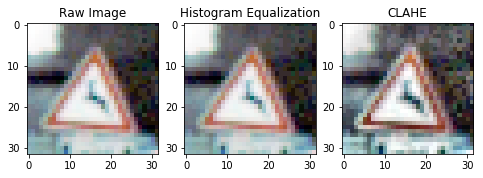

In [11]:
## Test preprocess_img
def testPreprocess(X_data): 
    A = X_data[1]
    print('Original Image')
    print(A[0:10,0:10,1])
    B = preprocess_img(A,0)
    print('Preprocessed Image')
    print(B[0:10,0:10,1])
    C = histEq(A)
    print('Histogram Equalized Image')
    print(C[0:10,0:10,1])
    D = CLAHE(A)
    print('CLAHE Image')
    print(D[0:10,0:10,1])
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(A)
    plt.title("Raw Image")
    plt.subplot(1, 3, 2)
    plt.imshow(C)
    plt.title("Histogram Equalization")
    plt.subplot(1, 3, 3)
    plt.imshow(D)
    plt.title("CLAHE")
    
    return 0    
    
testPreprocess(X_train)
print('Preprocess checked')

In [12]:
## [3] Image Augmentations and Transformations

## Brightness

# Convert RGB to HSV and then alter the saturation to add affects of random brightness on the image. 
# Output: image converted back to RGB
# (Reference to Vivek Yadav)
def brightness_augment(img):
    # convert to HSV
    img_aug = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    img_aug = np.array(img_aug, dtype = np.float64)    # convert to float64 to allow for wider range of brightness alterations
    
    # random brightness
    random_bright = 0.5+np.random.uniform()
    
    # apply brightness augmentation
    img_aug[:,:,2] = img_aug[:,:,2]*random_bright
    img_aug[:,:,2][img_aug[:,:,2] > 255] = 255         # cap the maximum brightness to 255
    
    # convert image back to uint8 RGB image
    img_aug = np.array(img_aug, dtype = np.uint8)
    img_aug = cv2.cvtColor(img_aug, cv2.COLOR_HSV2RGB)
    
    return img_aug

def b_aug_batch(X_data):
    return np.array([brightness_augment(X_data[i]) for i in range(len(X_data))])

Original Image
[[255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]
Brightness Augmented Image
[[239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]]
Histogram Equalized Image
[[255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 2

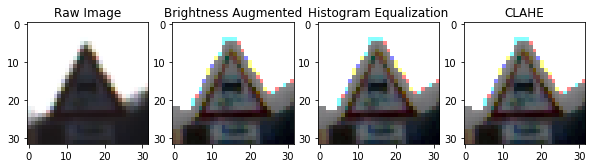

In [13]:
## Testing brightness_augment(img)
def testBrightness(X_data):
    A = X_data[0]
    print('Original Image')
    print(A[0:10,0:10,1])
    B = brightness_augment(A)
    print('Brightness Augmented Image')
    print(B[0:10,0:10,1])
    C = histEq(B)
    print('Histogram Equalized Image')
    print(C[0:10,0:10,1])
    D = CLAHE(B)
    print('CLAHE Image')
    print(D[0:10,0:10,1])
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 4, 1)
    plt.imshow(A)
    plt.title("Raw Image")
    plt.subplot(1, 4, 2)
    plt.imshow(B)
    plt.title("Brightness Augmented")
    plt.subplot(1, 4, 3)
    plt.imshow(C)
    plt.title("Histogram Equalization")
    plt.subplot(1, 4, 4)
    plt.imshow(C)
    plt.title("CLAHE")
    
    return 0

testBrightness(X_train)
print('Brightness Augmentation checked')

In [14]:
## Transformations
# Rotations, translation, and shearing are to remove the importance of global spatial positioning of the sign within the image
# from the model, so images of signs that are not centered or are rotated or sheared will can be detected equally. 

def rotate(img,ang_range,return_image=0):
    ang_rot = np.random.uniform(ang_range) - ang_range/2              # generate random angle rotation within range
    h,w,ch = image.shape
    c_x, c_y = int(h/2), int(w/2)           
    
    # generate rotation matrix
    rot_M = cv2.getRotationMatrix2D((c_x,c_y),ang_rot,1)              
    
    # return rotated image or rotation matrix
    if return_image:
        # rotate image
        rot = cv2.warpAffine(img,rot_M,img.shape[:2])
    else:
        rot = rot_M
    return rot

def translate(img,trans_range,return_image = 0):
    trans_x = trans_range*np.random.uniform()-trans_range/2
    trans_y = trans_range*np.random.uniform()-trans_range/2
    
    # generate translation matrix
    trans_M = np.float32([[1,0,trans_x],[0,1,trans_y]])
    
    # return translated image or translation matrix
    if return_image:
        # translate image
        trans = cv2.warpAffine(img,trans_M,img.shape[:2])
    else:
        trans = trans_M
    return trans

# Shear image to account for different angles which images are taken at. 
# (Reference to Vivek Yadav)
def shear(img,shear_range,return_image = 0):
    # define reference points 
    a = 5                      
    b = 20
    pts1 = np.float32([[a,a],[b,a],[a,b]])
    
    # define sheared points
    shear_a = a + shear_range*np.random.uniform()-shear_range/2
    shear_b = b + shear_range*np.random.uniform()-shear_range/2
    
    pts2 = np.float32([[shear_a,a],[shear_b,shear_a],[a,shear_b]])
    
    # generate shearing matrix 
    shear_M = cv2.getAffineTransform(pts1,pts2)
    
    # return sheared image or shearing matrix
    if return_image:
        shear = cv2.warpAffine(img,shear_M,img.shape[:2])
    else:
        shear = shear_M
    return shear
    
def transform_img(img,ang_range,trans_range,shear_range):
    # rotation 
    rotM = rotate(img,ang_range, 0)
    
    # translation
    transM = translate(img,trans_range, 0)
    
    # shear 
    shearM = shear(img,shear_range, 0)
    
    # combine
    transf_img = cv2.warpAffine(img,rotM,img.shape[:2])
    transf_img = cv2.warpAffine(transf_img,transM,transf_img.shape[:2])
    transf_img = cv2.warpAffine(transf_img,shearM,transf_img.shape[:2])
    
    return transf_img

def transform_batch(X_data,ang_range,trans_range,shear_range):
    for i in range(len(X_data)):
        X_data[i] = transform_img(X_data[i],ang_range,trans_range,shear_range)
        
    return X_data


Transformations Checked


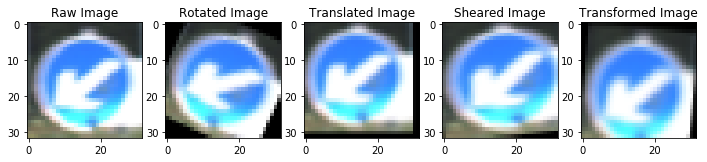

In [15]:
## Testing transformations:
def testTransformation(X_data,ang_range,trans_range,shear_range):
    A = X_data[200]
    
    # rotation 
    rotImg = rotate(A,ang_range,1)
    
    # translation
    transImg = translate(A,trans_range,1)
    
    # shear 
    shearImg = shear(A,shear_range,1)
    
    # combined (different rotation, translation, and shear than individual ones)
    transfImg = transform_img(A,ang_range,trans_range,shear_range)
    
    # plotting
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 5, 1)
    plt.imshow(A)
    plt.title("Raw Image")
    plt.subplot(1, 5, 2)
    plt.imshow(rotImg)
    plt.title("Rotated Image")
    plt.subplot(1, 5, 3)
    plt.imshow(transImg)
    plt.title("Translated Image")
    plt.subplot(1, 5, 4)
    plt.imshow(shearImg)
    plt.title("Sheared Image")
    plt.subplot(1, 5, 5)
    plt.imshow(transfImg)
    plt.title("Transformed Image")
    
    return 0

# can play around with these values
ang_range = 90              
trans_range = 10
shear_range = 5
testTransformation(X_train,ang_range,trans_range,shear_range)
print('Transformations Checked')

In [16]:
# [4] Data Processing for Data Sets 

## [A] Training Data
# Apply: Transformations, Brightness Augmentations, and lastly Preprocessing
# Shuffle data for each epoch
def process_train_img(img,ang_range,trans_range,shear_range,use_CLAHE):
    
    # Transformations
    img = transform_img(img,ang_range,trans_range,shear_range)
    
    # Brightness Augmentation
    img = brightness_augment(img)
    
    # Preprocessing
    img = preprocess_img(img,use_CLAHE)
    
    return img

def process_train_batch(X_data,y_data,ang_range,trans_range,shear_range,use_CLAHE):

    # Shuffle the data
    X_data, y_data = shuffle(X_data, y_data)
    
    # process all images in batch
    for i in range(len(X_data)):
        X_data[i] = process_train_img(X_data[i],ang_range,trans_range,shear_range,use_CLAHE)
    
    return X_data, y_data

## [B] Validation Data
# Apply: Preprocessing
# Shuffle data for each epoch

def shuffle_preprocess(X_data,y_data,use_CLAHE):
    # Shuffle the data
    X_data, y_data = shuffle(X_data, y_data)

    # preprocess all images in data set
    X_data = preprocess_batch(X_data,use_CLAHE)
    
    return X_data, y_data
    
## [C] Testing Data
# Apply: Preprocessing
# use shuffle_preprocess(X_test,y_test,use_CLAHE) or simply shuffle the test data and use preprocess_batch()

In [17]:
## Test Data Processing 

def testDataProcessing(X_train, y_train, X_valid, y_valid, X_test, y_test, ang_range, trans_range, shear_range, use_CLAHE):
    
    # Training Data Set
    X_train_processed, y_train_processed = process_train_batch(X_train,y_train,ang_range,trans_range,shear_range,use_CLAHE)

    # Validation Data Set 
    X_valid_processed, y_valid_processed = shuffle_preprocess(X_valid,y_valid,use_CLAHE)
    
    # Test Data Set 
    X_test_processed, y_valid_processed = shuffle_preprocess(X_test,y_test,use_CLAHE)
    
    return 0

ang_range = 90              
trans_range = 10
shear_range = 5
use_CLAHE = 1    
start_time = time.time()
testDataProcessing(X_train, y_train, X_valid, y_valid, X_test, y_test, ang_range, trans_range, shear_range, use_CLAHE)
end_time = time.time()
time_diff = end_time-start_time 
print('Data Processing for 1 Epoch Takes ~',time_diff,' Seconds.')
print('Data Processing Checked')

Data Processing for 1 Epoch Takes ~ 16.412853002548218  Seconds.
Data Processing Checked


### Setup TensorFlow

In [18]:
import tensorflow as tf
print("TensorFlow is setup. Proceed..")

TensorFlow is setup. Proceed..


## Model Architecture

### Initial Attempt Archetecture (Based off LeNet-5)

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since our images are in color, C is 3 in this case.

### Archetecture 
**Layer 1: Convolutional.** Output shape: [28,28,6]
<br>
**Activation.** ReLu
<br>
**Pooling.** Output shape: [14,14,6]

**Layer 2: Convolutonal.** Output shape: [10,10,16]
<br>
**Activation.** ReLu
<br>
**Pooling.** Output shape: [5,5,16]

**Flatten** [5,5,16] --> [400]
Flatten converts output from 3D to 1D to transition from filter layers to fully connected layers

**Layer 3: Fully Connected.** Output shape: [120]
<br>
**Activation.** ReLu

**Layer 4: Fully Connected.** Output shape: [84]
<br>
**Activation.** ReLu

**Layer 5: Fully Connected (Logits).** Output shape: [43]

### Output 
Return the result of final fully connected layer (logits)



In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

In [20]:

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

def fullConn(x,W,b):
    return (tf.matmul(x,W) + b)

In [21]:
## Le-Net Archetecture
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #  Create Layer's Weights and Biases 
    weights = {
        'W_conv1': tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean = mu, stddev = sigma)),
        'W_conv2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma)),
        'W_fc1': tf.Variable(tf.truncated_normal([400, 120], mean = mu, stddev = sigma)),
        'W_fc2': tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma)),
        'W_fc3': tf.Variable(tf.truncated_normal([84, 43], mean = mu, stddev = sigma))}


    biases = {
        'b_conv1': tf.Variable(tf.zeros([6])),
        'b_conv2': tf.Variable(tf.zeros([16])),
        'b_fc1': tf.Variable(tf.zeros([120])),
        'b_fc2': tf.Variable(tf.zeros([84])),
        'b_fc3': tf.Variable(tf.zeros([43]))}

    
    # TODO: Layer 1: Convolutional + Activation. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x, weights['W_conv1'], biases['b_conv1'],strides=1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, 2)

    # TODO: Layer 2: Convolutional + Activation. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['W_conv2'], biases['b_conv2'],strides=1)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, 2)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    #print(conv2.get_shape())
    fc0 = flatten(conv2)
    #print(fc0.get_shape())
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = fullConn(fc0, weights['W_fc1'], biases['b_fc1'])
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = fullConn(fc1, weights['W_fc2'], biases['b_fc2'])
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = fullConn(fc2, weights['W_fc3'], biases['b_fc3'])
    
    return logits

### Second Attempt Archetecture (model 2)

### Input
Model 2 architecture accepts a 32x32xC image as input, where C is the number of color channels. Since our images are in color, C is 3 in this case.

### Archetecture 
**Layer 0: Convolutional 1x1x3.** Output shape: [32,32,3]
<br>
**Activation.** ReLu

**Layer 1: Convolutional.** Output shape: [28,28,6]
<br>
**Activation.** ReLu
<br>
**Pooling.** Output shape: [14,14,6]
<br>
**Dropout.** Rate = 0.5, Output shape: [14,14,6]

**Layer 2: Convolutonal.** Output shape: [10,10,16]
<br>
**Activation.** ReLu
<br>
**Pooling.** Output shape: [5,5,16]
<br>
**Dropout.** Rate = 0.5, Output shape: [5,5,16]

**Layer 3: Convolutonal.** Output shape: [10,10,16]
<br>
**Activation.** ReLu
<br>
**Pooling.** Output shape: [5,5,16]
<br>
**Dropout.** Rate = 0.5, Output shape: [5,5,16]

**Flatten** [5,5,16] --> [400]
Flatten converts output from 3D to 1D to transition from filter layers to fully connected layers

**Layer 4: Fully Connected.** Output shape: [120]
<br>
**Activation.** ReLu
<br>
**Dropout.** Rate = 0.5, Output shape: [120]

**Layer 5: Fully Connected.** Output shape: [84]
<br>
**Activation.** ReLu
<br>
**Dropout.** Rate = 0.5, Output shape: [84]

**Layer 6: Fully Connected (Logits).** Output shape: [43]

### Output 
Return the result of final fully connected layer (logits)


In [22]:
def conv_layer(x, input_depth, filter_size, num_filter, W_name, b_name, mu, sigma, strides):
    # Create W
    W = tf.Variable(tf.truncated_normal([filter_size, filter_size, input_depth, num_filter], mean = mu, stddev = sigma),
                   name=W_name)
    # Create b
    b = tf.Variable(tf.zeros([num_filter]),
                   name=b_name)
    
    # create convolutional layer 
    conv = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    conv = tf.nn.bias_add(conv, b)
    conv = tf.nn.relu(conv)        # add activation
    
    return W,b,conv

def conv_layerS(x, input_depth, filter_size, num_filter, W_name, b_name, mu, sigma, strides):
    # Create W
    W = tf.Variable(tf.truncated_normal([filter_size, filter_size, input_depth, num_filter], mean = mu, stddev = sigma),
                   name=W_name)
    # Create b
    b = tf.Variable(tf.zeros([num_filter]),
                   name=b_name)
    
    # create convolutional layer 
    conv = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    conv = tf.nn.bias_add(conv, b)
    conv = tf.nn.relu(conv)        # add activation
    
    return W,b,conv

def fullyConn_layer(x, num_input, num_output, W_name, b_name, mu, sigma):
    # Create W
    W = tf.Variable(tf.truncated_normal([num_input, num_output], mean = mu, stddev = sigma),
                   name=W_name)
    # Create b
    b = tf.Variable(tf.zeros([num_output]),
                   name=b_name)
    
    # create fully connected layer
    fc = (tf.matmul(x,W) + b)
    
    return W,b,fc

In [23]:
## Second Attempt Model
def model2(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Variables for Layers: 
    input_depth = 3
    
    # Layer 0: 1x1 Convolutional
    filter_size_0 = 1
    filter_num_0 = 3
    W_name_conv0, b_name_conv0 = 'W_conv0', 'b_conv0' 
    
    # Layer 1: Convolutional 
    filter_size_1 = 5
    filter_num_1 = 64
    W_name_conv1, b_name_conv1 = 'W_conv1', 'b_conv1' 

    # Layer 2: Convolutional
    filter_size_2 = 5
    filter_num_2 = 128
    W_name_conv2, b_name_conv2 = 'W_conv2', 'b_conv2' 
    
    # Layer 3: Convolutional
    filter_size_3 = 5
    filter_num_3 = 256
    W_name_conv3, b_name_conv3 = 'W_conv3', 'b_conv3' 
    
    # Layer 4: Fully Connected 
    fc_out_1 = 1024
    W_name_fc1, b_name_fc1 = 'W_fc1', 'b_fc1' 
    
    # Layer 5: Fully Connected 
    fc_out_2 = 1024
    W_name_fc2, b_name_fc2 = 'W_fc2', 'b_fc2' 
    
    # Layer 6: Fully Connected (LAST LAYER MUST HAVE 43 OUTPUTS)
    fc_out_3 = 43
    W_name_fc3, b_name_fc3 = 'W_fc3', 'b_fc3' 
    

    ## PIPELINE
    
    ### [0.] ###
    
    # Layer 0: Convolutional [1x1x3] + Activation. Input = 32x32x3. Output = 32x32x3.
    W_conv0, b_conv0, conv0 = conv_layer(x, input_depth, filter_size_0, filter_num_0, W_name_conv0, b_name_conv0, 
                                         mu, sigma, strides=1)
    ### [I.] ###
    
    # Layer 1: Convolutional + Activation. Input = 32x32x3. Output = 28x28x6.
    W_conv1, b_conv1, conv1 = conv_layer(conv0, filter_num_0, filter_size_1, filter_num_1, W_name_conv1, b_name_conv1, 
                                         mu, sigma, strides=1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, 2)

    # Dropout. Input = 14x14x6. Output = 14x14x6.
    conv1_dropout = tf.nn.dropout(conv1,keep_prob)

    ### [II.] ###   
    
    # Layer 2: Convolutional + Activation. Output = 10x10x16. 
    W_conv2, b_conv2, conv2 = conv_layer(conv1_dropout, filter_num_1, filter_size_2, filter_num_2, W_name_conv2, b_name_conv2, 
                                         mu, sigma, strides=1)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, 2)
    
    # Dropout. Input = 10x10x16. Output = 5x5x16.
    conv2_dropout = tf.nn.dropout(conv2,keep_prob)
    
    ### [III.] ###
    
    # Layer 3: Convolutional + Activation. Output = 5x5x32.
    W_conv3, b_conv3, conv3 = conv_layer(conv2_dropout, filter_num_2, filter_size_3, filter_num_3, W_name_conv3, b_name_conv3, 
                                         mu, sigma, strides=1)
    # Pooling. Input = 5x5x32. Output = 3x3x32.
    conv3 = maxpool2d(conv3, 2)
    
    # Dropout. Input = 3x3x32. Output = 3x3x32.
    conv3_dropout = tf.nn.dropout(conv3,keep_prob)
    
    ### [flatten] ###
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv3_dropout)  
    fc0_shape = fc0.get_shape()
    fc_out_0 = fc0_shape[1:].num_elements()     # Get number of elements
    
    ### [IV.] ###
    
    # Layer 4: Fully Connected. Input = 400. Output = 120. ***FAILURE IS HAPPENING HERE***
    W_fc1, b_fc1, fc1 = fullyConn_layer(fc0, fc_out_0, fc_out_1, W_name_fc1, b_name_fc1, 
                                       mu, sigma)
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout. Input = 10x10x16. Output = 5x5x16.
    fc1_dropout = tf.nn.dropout(fc1,keep_prob)

    ### [V.] ###
    
    # Layer 5: Fully Connected. Input = 120. Output = 84.
    W_fc2, b_fc2, fc2 = fullyConn_layer(fc1_dropout, fc_out_1, fc_out_2, W_name_fc2, b_name_fc2, 
                                       mu, sigma)
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout. Input = 10x10x16. Output = 5x5x16.
    fc2_dropout = tf.nn.dropout(fc2,keep_prob)

    ### [VI.] ###
    
    # Layer 6: Fully Connected. Input = 84. Output = 43.
    W_fc3, b_fc3, logits = fullyConn_layer(fc2_dropout, fc_out_2, fc_out_3, W_name_fc3, b_name_fc3, 
                                          mu, sigma)
    return logits, W_conv0, W_conv1, W_conv2, W_conv3, W_fc1, W_fc2, W_fc3

### Third Attempt Archetecture (model 3)
More complecated version of version 2 to handel more data processing. 

### Input
Model 3 architecture accepts a 32x32xC image as input, where C is the number of color channels. Since our images are in color, C is 3 in this case.

### Archetecture 
**Layer 0: Convolutional 1x1x3.** Output shape: [32,32,3]
<br>
**Activation.** ReLu

**Layer 1: Convolutional.** Output shape: [28,28,6]
<br>
**Activation.** ReLu

**Layer 2: Convolutional.** Output shape: [28,28,6]
<br>
**Activation.** ReLu
<br>
**Pooling.** Output shape: [14,14,6]
<br>
**Dropout.** Rate = 0.5, Output shape: [14,14,6]

**Layer 3: Convolutonal.** Output shape: [10,10,16]
<br>
**Activation.** ReLu

**Layer 4: Convolutonal.** Output shape: [10,10,16]
<br>
**Activation.** ReLu
<br>
**Pooling.** Output shape: [5,5,16]
<br>
**Dropout.** Rate = 0.5, Output shape: [5,5,16]

**Layer 5: Convolutonal.** Output shape: [10,10,16]
<br>
**Activation.** ReLu

**Layer 6: Convolutonal.** Output shape: [10,10,16]
<br>
**Activation.** ReLu
<br>
**Pooling.** Output shape: [5,5,16]
<br>
**Dropout.** Rate = 0.5, Output shape: [5,5,16]

**Flatten** [5,5,16] --> [400]
Flatten converts output from 3D to 1D to transition from filter layers to fully connected layers

**Layer 7: Fully Connected.** Output shape: [120]
<br>
**Activation.** ReLu
<br>
**Dropout.** Rate = 0.5, Output shape: [120]

**Layer 8: Fully Connected.** Output shape: [84]
<br>
**Activation.** ReLu
<br>
**Dropout.** Rate = 0.5, Output shape: [84]

**Layer 9: Fully Connected.** Output shape: [84]
<br>
**Activation.** ReLu
<br>
**Dropout.** Rate = 0.5, Output shape: [84]

**Layer 10: Fully Connected (Logits).** Output shape: [43]

### Output 
Return the result of final fully connected layer (logits)


In [24]:
## Second Attempt Model
def model3(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Variables for Layers: 
    input_depth = 3
    
    # Layer 0: 1x1 Convolutional
    filter_size_0 = 1
    filter_num_0 = 3
    W_name_conv0, b_name_conv0 = 'W_conv0', 'b_conv0' 
    
    # Layer 1: Convolutional 
    filter_size_1 = 5
    filter_num_1 = 64
    W_name_conv1, b_name_conv1 = 'W_conv1', 'b_conv1' 

    # Layer 2: Convolutional
    filter_size_2 = 5
    filter_num_2 = 64
    W_name_conv2, b_name_conv2 = 'W_conv2', 'b_conv2' 
    
    # Layer 3: Convolutional
    filter_size_3 = 5
    filter_num_3 = 128
    W_name_conv3, b_name_conv3 = 'W_conv3', 'b_conv3' 
    
    # Layer 4: Convolutional
    filter_size_4 = 5
    filter_num_4 = 128
    W_name_conv4, b_name_conv4 = 'W_conv4', 'b_conv4' 
    
    # Layer 5: Convolutional
    filter_size_5 = 5
    filter_num_5 = 256
    W_name_conv5, b_name_conv5 = 'W_conv5', 'b_conv5' 
    
    # Layer 6: Convolutional
    filter_size_6 = 5
    filter_num_6 = 256
    W_name_conv6, b_name_conv6 = 'W_conv6', 'b_conv6' 
    
    # Layer 7: Fully Connected 
    fc_out_1 = 1024
    W_name_fc1, b_name_fc1 = 'W_fc1', 'b_fc1' 
    
    # Layer 8: Fully Connected 
    fc_out_2 = 1024
    W_name_fc2, b_name_fc2 = 'W_fc2', 'b_fc2' 
    
    # Layer 9: Fully Connected 
    fc_out_3 = 256
    W_name_fc3, b_name_fc3 = 'W_fc3', 'b_fc3' 
    
    # Layer 10: Fully Connected (LAST LAYER MUST HAVE 43 OUTPUTS)
    fc_out_4 = 43
    W_name_fc4, b_name_fc4 = 'W_fc4', 'b_fc4' 
    

    ## PIPELINE
    
    ### [0.] ###
    
    # Layer 0: Convolutional [1x1x3] + Activation. Input = 32x32x3. Output = 32x32x3.
    W_conv0, b_conv0, conv0 = conv_layer(x, input_depth, filter_size_0, filter_num_0, W_name_conv0, b_name_conv0, 
                                         mu, sigma, strides=1)
    ### [I.] ###
    
    # Layer 1: Convolutional + Activation. Input = 32x32x3. Output = 28x28x6.
    W_conv1, b_conv1, conv1 = conv_layerS(conv0, filter_num_0, filter_size_1, filter_num_1, W_name_conv1, b_name_conv1, 
                                         mu, sigma, strides=1)
    # Layer 2: Convolutional + Activation. Input = 32x32x3. Output = 28x28x6.
    W_conv2, b_conv2, conv2 = conv_layerS(conv1, filter_num_1, filter_size_2, filter_num_2, W_name_conv2, b_name_conv2, 
                                         mu, sigma, strides=1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv2 = maxpool2d(conv2, 2)

    # Dropout. Input = 14x14x6. Output = 14x14x6.
    conv2_dropout = tf.nn.dropout(conv2,keep_prob)

    ### [II.] ###   
    
    # Layer 3: Convolutional + Activation. Output = 10x10x16. 
    W_conv3, b_conv3, conv3 = conv_layerS(conv2_dropout, filter_num_2, filter_size_3, filter_num_3, W_name_conv3, b_name_conv3, 
                                         mu, sigma, strides=1)
    # Layer 4: Convolutional + Activation. Output = 10x10x16. 
    W_conv4, b_conv4, conv4 = conv_layerS(conv3, filter_num_3, filter_size_4, filter_num_4, W_name_conv4, b_name_conv4, 
                                         mu, sigma, strides=1)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv4 = maxpool2d(conv4, 2)
    
    # Dropout. Input = 10x10x16. Output = 5x5x16.
    conv4_dropout = tf.nn.dropout(conv4,keep_prob)
    
    ### [III.] ###
    
    # Layer 5: Convolutional + Activation. Output = 5x5x32.
    W_conv5, b_conv5, conv5 = conv_layerS(conv4_dropout, filter_num_4, filter_size_5, filter_num_5, W_name_conv5, b_name_conv5, 
                                         mu, sigma, strides=1)
    # Layer 6: Convolutional + Activation. Output = 5x5x32.
    W_conv6, b_conv6, conv6 = conv_layerS(conv5, filter_num_5, filter_size_6, filter_num_6, W_name_conv6, b_name_conv6, 
                                         mu, sigma, strides=1)
    # Pooling. Input = 5x5x32. Output = 3x3x32.
    conv6 = maxpool2d(conv6, 2)
    
    # Dropout. Input = 3x3x32. Output = 3x3x32.
    conv6_dropout = tf.nn.dropout(conv6,keep_prob)
    
    ### [flatten] ###
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv6_dropout)  
    fc0_shape = fc0.get_shape()
    fc_out_0 = fc0_shape[1:].num_elements()     # Get number of elements
    
    ### [IV.] ###
    
    # Layer 7: Fully Connected. Input = 400. Output = 120. ***FAILURE IS HAPPENING HERE***
    W_fc1, b_fc1, fc1 = fullyConn_layer(fc0, fc_out_0, fc_out_1, W_name_fc1, b_name_fc1, 
                                       mu, sigma)
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout. Input = 10x10x16. Output = 5x5x16.
    fc1_dropout = tf.nn.dropout(fc1,keep_prob)

    ### [V.] ###
    
    # Layer 8: Fully Connected. Input = 120. Output = 84.
    W_fc2, b_fc2, fc2 = fullyConn_layer(fc1_dropout, fc_out_1, fc_out_2, W_name_fc2, b_name_fc2, 
                                       mu, sigma)
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout. Input = 10x10x16. Output = 5x5x16.
    fc2_dropout = tf.nn.dropout(fc2,keep_prob)

    ### [VI.] ###
    
    # Layer 9: Fully Connected. Input = 120. Output = 84.
    W_fc3, b_fc3, fc3 = fullyConn_layer(fc2_dropout, fc_out_2, fc_out_3, W_name_fc3, b_name_fc3, 
                                       mu, sigma)
    # Activation.
    fc3 = tf.nn.relu(fc3)
    
    # Dropout. Input = 10x10x16. Output = 5x5x16.
    fc3_dropout = tf.nn.dropout(fc3,keep_prob)
    
    ### [VII.] ###
    
    # Layer 10: Fully Connected. Input = 84. Output = 43.
    W_fc4, b_fc4, logits = fullyConn_layer(fc3_dropout, fc_out_3, fc_out_4, W_name_fc4, b_name_fc4, 
                                          mu, sigma)
    return logits, W_conv0, W_conv1, W_conv2, W_conv3, W_conv4, W_conv5, W_conv6, W_fc1, W_fc2, W_fc3, W_fc4

### Features and Labels
Train the model to calssify the traffic sign data.

x is a placeholder for a batch of input images. 
y is a plcaeholder for a batch of output labels.

In [25]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder("float")
one_hot_y = tf.one_hot(y, 43)

# Learnig Rate 
rate_var = tf.placeholder(tf.float32, shape = [])

## Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [26]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import math

# Hyperparameters
EPOCHS = 150
BATCH_SIZE = 128
rate = 0.001              # learning rate
keep_prob = 0.5           # dropout probability
beta = 0.00005            # L2 Regularization scaling factor
factor = 0.96             # rate reduction factor 
thresh = 0.005            # rate difference threshold

#global_factor = math.ceil(n_train/BATCH_SIZE)*EPOCH          # number of possible iterations
#global_factor = EPOCHS

# Parameters 
use_CLAHE = 1             # Set if CLAHE (use_CLAHE = 1) or Histogram Equalization (use_CLAHE = 0) is used,
ang_range = 10            # angle rotation range, Past [10*, 90, 30]
trans_range = 2           # translation range, Past [2*, 10, 10]
shear_range = 2           # shear range, Past [2*, 5, 5]
decrease_rate = 0.9       # transformation loss rate

# Set Testing Data
X_test_processed, y_test_processed = shuffle_preprocess(X_test, y_test, use_CLAHE)    # UPDATE use_CLAHE for final model that you test

### Training Pipeline

Create a training pipleline that uses the model to classify the traffic sign data. 

In [27]:
### Training Pipeline 
use_Model1 = False
use_Model2 = True
use_Model3 = False

const_rate = False

# check to make sure only one model is being used
if ((use_Model1 & use_Model2) or (use_Model1 & use_Model3) or (use_Model2 & use_Model3)):
    print('Selecting more than one model to be true')
elif not (use_Model1 or use_Model2 or use_Model3):
    print('Not selecting a model to use')
else:
    print('Proceed')


Proceed


In [28]:

### Model 1 (LeNet) ###
if use_Model1:
    logits = lenet(x)
    regulizers = 0

### Model 2 ###
elif use_Model2:
    logits, W_conv0, W_conv1, W_conv2, W_conv3, W_fc1, W_fc2, W_fc3 = model2(x,keep_prob)

    regularizers = (tf.nn.l2_loss(W_conv0)
                   + tf.nn.l2_loss(W_conv1)
                   + tf.nn.l2_loss(W_conv2)
                   + tf.nn.l2_loss(W_conv3)
                   + tf.nn.l2_loss(W_fc1)
                   + tf.nn.l2_loss(W_fc2)
                   + tf.nn.l2_loss(W_fc3))

### Model 3 ###
elif use_Model3:
    logits, W_conv0, W_conv1, W_conv2, W_conv3, W_conv4, W_conv5, W_conv6, W_fc1, W_fc2, W_fc3, W_fc4 = model3(x,keep_prob)

    regularizers = (tf.nn.l2_loss(W_conv0)
                   + tf.nn.l2_loss(W_conv1) + tf.nn.l2_loss(W_conv2)
                   + tf.nn.l2_loss(W_conv3) + tf.nn.l2_loss(W_conv4)
                   + tf.nn.l2_loss(W_conv5) + tf.nn.l2_loss(W_conv6)
                   + tf.nn.l2_loss(W_fc1)
                   + tf.nn.l2_loss(W_fc2) 
                   + tf.nn.l2_loss(W_fc3)
                   + tf.nn.l2_loss(W_fc4))

print('No Problems here...')

No Problems here...


In [29]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

loss_operation = tf.reduce_mean(cross_entropy)+beta*regularizers

if const_rate:
    # Constant Learning Rate
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
else:
    # Modular Learning Rate
    optimizer = tf.train.AdamOptimizer(learning_rate = rate_var)

training_operation = optimizer.minimize(loss_operation)

print('No Problems here...')

No Problems here...


### Model Evaluation
Evaluate the loss and acuracy of the model for a given data set.

In [30]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train and Validate the Model
Run the training data trhough the training pipeline to train the model. 
* Before each epoch, shuffle the training set.
* After each epoch, measure the loss and accuracy of the validation set.
* Save the model after training. 

In [31]:
def percDiff(a,b):
    minVal = np.min([a,b])
    maxVal = np.max([a,b])
    return (maxVal-minVal)/maxVal

In [ ]:
# Accuracy Tracking 
valid_accuracy = []
best_valid = 0
valid_accuracy.append(best_valid)

start_time = time.time()           # time training

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        epoch_start_time = time.time() # time epoch training time
        
        # incremently reduce transformations
        ang_range = ang_range*(decrease_rate**i)
        trans_range = trans_range*(decrease_rate**i)
        shear_range = shear_range*(decrease_rate**i)  
        
        # Process Training Data and Validation Data for each EPOCH
        # TRAINING
        #X_train_processed, y_train_processed = process_train_batch(X_train,y_train,ang_range,trans_range,shear_range,use_CLAHE)
        
        #### Transform, brightness, preprocess
        #X_train_processed = transform_batch(X_train,ang_range,trans_range,shear_range)                    # transformations 
        #X_train_processed = b_aug_batch(X_train_processed)                                                # brightness 
        #X_train_processed, y_train_processed = shuffle_preprocess(X_train_processed,y_train,use_CLAHE)    # preprocessing
        
        #### Brightness, preprocess 
        X_train_processed = b_aug_batch(X_train)                                                          # brightness 
        X_train_processed, y_train_processed = shuffle_preprocess(X_train_processed,y_train,use_CLAHE)    # preprocessing
        
        #### Preprocess
        #X_train_processed, y_train_processed = shuffle_preprocess(X_train,y_train,use_CLAHE)    # preprocessing

        # VALIDATION
        X_valid_processed, y_valid_processed = shuffle_preprocess(X_valid,y_valid,use_CLAHE)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train_processed[offset:end]
            
            if const_rate:
                ## For constant rate ##
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            else:
                ## For variable rate ##
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, rate_var: rate})
            
        validation_accuracy = evaluate(X_valid_processed, y_valid_processed)
            
        # check to see if need to lower learning rate by factor
        if not const_rate:
            if (percDiff(validation_accuracy,valid_accuracy[-1]) < thresh):
                rate = rate*(factor**(EPOCHS/(i+1)))
        
        valid_accuracy.append(validation_accuracy)
                
        epoch_end_time = time.time()
        epoch_time_diff = epoch_end_time - epoch_start_time
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Run Time: ", epoch_time_diff, " Seconds")
        print("Current Learning Rate: ", rate)
        # save model at best epoch
        if (validation_accuracy > best_valid):
            best_valid = validation_accuracy
            
            # Save model of current best accuracy
            saver.save(sess, './Saved_Models/model_2_config_2h')
            print("Model saved")
        
        print()
        
    #saver.save(sess, './Saved_Models/model_3_config_h')
    #print("Model saved")

end_time = time.time()
time_diff = end_time - start_time
print("Total training Time: ", time_diff, " Seconds")

Training...

EPOCH 1 ...
Validation Accuracy = 0.187
Run Time:  19.507763385772705  Seconds
Current Learning Rate:  0.001
Model saved

EPOCH 2 ...
Validation Accuracy = 0.500
Run Time:  18.38879895210266  Seconds
Current Learning Rate:  0.001
Model saved

EPOCH 3 ...
Validation Accuracy = 0.668
Run Time:  17.888951778411865  Seconds
Current Learning Rate:  0.001
Model saved

EPOCH 4 ...
Validation Accuracy = 0.765
Run Time:  17.534865617752075  Seconds
Current Learning Rate:  0.001
Model saved

EPOCH 5 ...
Validation Accuracy = 0.820
Run Time:  17.924004554748535  Seconds
Current Learning Rate:  0.001
Model saved

EPOCH 6 ...
Validation Accuracy = 0.848
Run Time:  18.187225580215454  Seconds
Current Learning Rate:  0.001
Model saved

EPOCH 7 ...
Validation Accuracy = 0.876
Run Time:  17.652724027633667  Seconds
Current Learning Rate:  0.001
Model saved

EPOCH 8 ...
Validation Accuracy = 0.885
Run Time:  17.98583984375  Seconds
Current Learning Rate:  0.001
Model saved

EPOCH 9 ...
Vali

EPOCH 66 ...
Validation Accuracy = 0.953
Run Time:  18.13050937652588  Seconds
Current Learning Rate:  4.396954699518292e-07

EPOCH 67 ...
Validation Accuracy = 0.958
Run Time:  18.16370725631714  Seconds
Current Learning Rate:  4.012922033091183e-07

EPOCH 68 ...
Validation Accuracy = 0.957
Run Time:  18.029783725738525  Seconds
Current Learning Rate:  3.667356655456215e-07

EPOCH 69 ...
Validation Accuracy = 0.957
Run Time:  17.614041090011597  Seconds
Current Learning Rate:  3.3559258004465954e-07

EPOCH 70 ...
Validation Accuracy = 0.957
Run Time:  18.22006630897522  Seconds
Current Learning Rate:  3.074837260046481e-07

EPOCH 71 ...
Validation Accuracy = 0.962
Run Time:  17.94306492805481  Seconds
Current Learning Rate:  2.820765567380098e-07

EPOCH 72 ...
Validation Accuracy = 0.959
Run Time:  17.75548219680786  Seconds
Current Learning Rate:  2.5907891074113946e-07

EPOCH 73 ...
Validation Accuracy = 0.959
Run Time:  18.05148673057556  Seconds
Current Learning Rate:  2.382336415

### Evaluate (Test) the Model
**Only Test the model once you are completely satisfied to truely evalute the effectiveness.** <br> Ideally, after running the test, you don't need to make any changes i.e. **you only run this once!**

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [ ]:
print("Are you sure you are ready to proceed?")

In [ ]:
print("You can only run the test once...")

In [ ]:
print("Last chance...")

In [ ]:
print("Proceed to testing...")

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))              ##### WHEN READY, CHANGE THIS TO LOCATION OF SAVED MODEL

    test_accuracy = evaluate(X_test_processed, y_test_processed)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")